In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import norm, probplot, rankdata
from matplotlib import pyplot as plt
from matplotlib.axes import Axes
from typing import Tuple, Dict, Optional, Set, List
from scipy.stats import mannwhitneyu
import plotly.express as px
from scipy.stats import f_oneway
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Data info

In [2]:
path = 'Airbnb_Open_Data.csv'

In [3]:
airbnb_df = pd.read_csv(path,low_memory=False)

In [4]:
airbnb_df.shape

(102599, 26)

In [5]:
airbnb_df = airbnb_df.rename(columns = lambda column_name: column_name.lower().replace(' ','_'))

In [7]:
duplicateв_airbnb_df = airbnb_df.duplicated()
duplicateв_airbnb_df.value_counts()

False    102058
True        541
Name: count, dtype: int64

In [8]:
airbnb_df.drop_duplicates(keep='first')

id                                              name  \
0        1001254                Clean & quiet apt home by the park   
1        1002102                             Skylit Midtown Castle   
2        1002403               THE VILLAGE OF HARLEM....NEW YORK !   
3        1002755                                               NaN   
4        1003689  Entire Apt: Spacious Studio/Loft by central park   
...          ...                                               ...   
102053  57365208               Cozy bright room near Prospect Park   
102054  57365760         Private Bedroom with Amazing Rooftop View   
102055  57366313     Pretty Brooklyn One-Bedroom for 2 to 4 people   
102056  57366865        Room & private bathroom in historic Harlem   
102057  57367417                                   Rosalee Stewart   

            host_id host_identity_verified host_name neighbourhood_group  \
0       80014485718            unconfirmed  Madaline            Brooklyn   
1       52335172823               verified     Jenna           Manhattan   
2       78829239556                    NaN     Elise           Manhattan   
3       85098326012            unconfirmed     Garry            Brooklyn   
4       92037596077               verified    Lyndon           Manhattan   
...             ...                    ...       ...                 ...   
102053  77326652202            unconfirmed    Mariam            Brooklyn   
102054  45936254757               verified      Trey            Brooklyn   
102055  23801060917               verified   Michael            Brooklyn   
102056  15593031571            unconfirmed   Shireen           Manhattan   
102057  93578954226               verified   Stanley           Manhattan   

             neighbourhood       lat      long        country  ...  \
0               Kensington  40.64749 -73.97237  United States  ...   
1                  Midtown  40.75362 -73.98377  United States  ...   
2                   Harlem  40.80902 -73.94190  United States  ...   
3             Clinton Hill  40.68514 -73.95976  United States  ...   
4              East Harlem  40.79851 -73.94399  United States  ...   
...                    ...       ...       ...            ...  ...   
102053            Flatbush  40.64945 -73.96108  United States  ...   
102054            Bushwick  40.69872 -73.92718  United States  ...   
102055  Bedford-Stuyvesant  40.67810 -73.90822  United States  ...   
102056              Harlem  40.81248 -73.94317  United States  ...   
102057              Harlem  40.81315 -73.94747  United States  ...   

       service_fee minimum_nights number_of_reviews last_review  \
0            $193            10.0               9.0  10/19/2021   
1             $28            30.0              45.0   5/21/2022   
2            $124             3.0               0.0         NaN   
3             $74            30.0             270.0    7/5/2019   
4             $41            10.0               9.0  11/19/2018   
...            ...            ...               ...         ...   
102053         NaN            7.0              12.0   3/27/2019   
102054         NaN            1.0              19.0   8/31/2017   
102055         NaN            2.0              50.0   6/26/2019   
102056         NaN            2.0               0.0         NaN   
102057         NaN            4.0              22.0   6/15/2019   

        reviews_per_month review_rate_number calculated_host_listings_count  \
0                    0.21                4.0                            6.0   
1                    0.38                4.0                            2.0   
2                     NaN                5.0                            1.0   
3                    4.64                4.0                            1.0   
4                    0.10                3.0                            1.0   
...                   ...                ...                            ...   
102053               0.44                5.0                 

In [9]:
airbnb_df.dtypes

id                                  int64
name                               object
host_id                             int64
host_identity_verified             object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country_code                       object
instant_bookable                   object
cancellation_policy                object
room_type                          object
construction_year                 float64
price                              object
service_fee                        object
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
review_rate_number                float64
calculated_host_listings_count    float64
availability_365                  

In [11]:
airbnb_df.isna().sum()

id                                     0
name                                 250
host_id                                0
host_identity_verified               289
host_name                            406
neighbourhood_group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country_code                         131
instant_bookable                     105
cancellation_policy                   76
room_type                              0
construction_year                    214
price                                247
service_fee                          273
minimum_nights                       409
number_of_reviews                    183
last_review                        15893
reviews_per_month                  15879
review_rate_number                   326
calculated_host_listings_count       319
availability_365                     448
house_rules     

# Working with Duplicates and Nan

In [13]:
df=airbnb_df[['lat','long','country','country_code','neighbourhood_group','neighbourhood']].drop_duplicates()

In [14]:
df[df.country.isnull()]

lat      long country country_code neighbourhood_group  \
156     40.73226 -74.00401     NaN          NaN           Manhattan   
157     40.71363 -73.96398     NaN          NaN            Brooklyn   
158     40.77711 -73.95270     NaN          NaN           Manhattan   
159     40.68559 -73.98094     NaN          NaN            Brooklyn   
160     40.77456 -73.95323     NaN          NaN           Manhattan   
...          ...       ...     ...          ...                 ...   
101368  40.66063 -73.98348     NaN           US            Brooklyn   
101369  40.70588 -74.01590     NaN           US           Manhattan   
101370  40.68438 -73.95299     NaN           US            Brooklyn   
101371  40.77759 -73.95321     NaN           US           Manhattan   
101372  40.71218 -73.96048     NaN           US            Brooklyn   

             neighbourhood  
156           West Village  
157           Williamsburg  
158        Upper East Side  
159            Boerum Hill  
160        Upper East Side  
...                    ...  
101368     Windsor Terrace  
101369  Financial District  
101370  Bedford-Stuyvesant  
101371     Upper East Side  
101372        Williamsburg  

[532 rows x 6 columns]

In [15]:
airbnb_df.country.value_counts(normalize=True)

country
United States    1.0
Name: proportion, dtype: float64

In [17]:
airbnb_df.neighbourhood_group.value_counts(normalize=True)

neighbourhood_group
Manhattan        0.426947
Brooklyn         0.407936
Queens           0.129346
Bronx            0.026440
Staten Island    0.009311
brookln          0.000010
manhatan         0.000010
Name: proportion, dtype: float64

In [18]:
df=airbnb_df[['neighbourhood_group','neighbourhood']].drop_duplicates()

In [19]:
df['neighbourhood_group'] = df['neighbourhood_group'].str.title().replace('Manhatan','Manhattan').replace('Brookln','Brooklyn')

In [20]:
df.neighbourhood_group.value_counts(normalize=True)

neighbourhood_group
Queens           0.228070
Brooklyn         0.219298
Bronx            0.210526
Staten Island    0.192982
Manhattan        0.149123
Name: proportion, dtype: float64

In [21]:
dg = df.drop_duplicates().dropna (subset=['neighbourhood_group']).sort_values(by='neighbourhood')

In [22]:
dg = dg.dropna (subset=['neighbourhood']).sort_values(by='neighbourhood')

In [23]:
dg[dg.neighbourhood_group.isnull()]

Empty DataFrame
Columns: [neighbourhood_group, neighbourhood]
Index: []

In [24]:
data_pd = pd.merge(airbnb_df,dg,on=['neighbourhood'], how='left')

In [25]:
data_pd['neighbourhood_group_y'].fillna(data_pd.neighbourhood_group_x,inplace =True)

In [ ]:
data_pd.host_identity_verified.value_counts(normalize=True)

In [26]:
columns=['id','name','host_id','host_identity_verified','host_name','country','country_code',
         'last_review','reviews_per_month','calculated_host_listings_count','house_rules','license']

data_pd.drop(columns,axis=1,inplace=True)
data_pd.rename(columns={'neighbourhood_group_y':'neighbourhood_group'},inplace=True)

In [27]:
data_pd['price'] = data_pd['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
data_pd['service_fee'] = data_pd['service_fee'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [28]:
data_pd.isna().sum()

neighbourhood_group_x     29
neighbourhood             16
lat                        8
long                       8
instant_bookable         105
cancellation_policy       76
room_type                  0
construction_year        214
price                    247
service_fee              273
minimum_nights           409
number_of_reviews        183
review_rate_number       326
availability_365         448
neighbourhood_group        0
dtype: int64

In [29]:
cols_to_drop = []

for col in data_pd.columns:
    if (data_pd[col].isna().sum()/data_pd.shape[0])>0.8:
        cols_to_drop.append(col)
cols_to_drop

[]

In [30]:
(airbnb_df.isnull().sum()).sum()

190769

In [31]:
(data_pd.isnull().sum()).sum()

2342

In [32]:
data_pd.dropna(inplace=True)

In [33]:
data_pd.construction_year =data_pd.construction_year.astype(int)

In [34]:
(data_pd.isnull().sum()).sum()

0

# EDA

In [38]:
data_pd.dtypes

neighbourhood_group_x     object
neighbourhood             object
lat                      float64
long                     float64
instant_bookable          object
cancellation_policy       object
room_type                 object
construction_year          int32
price                    float64
service_fee              float64
minimum_nights           float64
number_of_reviews        float64
review_rate_number       float64
availability_365         float64
neighbourhood_group       object
dtype: object

In [36]:
data_pd.describe()

lat           long  construction_year          price  \
count  100588.000000  100588.000000      100588.000000  100588.000000   
mean       40.728064     -73.949623        2012.485674     625.377172   
std         0.055880       0.049560           5.763235     331.703018   
min        40.499790     -74.249840        2003.000000      50.000000   
25%        40.688730     -73.982570        2007.000000     340.000000   
50%        40.722260     -73.954440        2012.000000     625.000000   
75%        40.762790     -73.932340        2017.000000     913.000000   
max        40.916970     -73.705220        2022.000000    1200.000000   

         service_fee  minimum_nights  number_of_reviews  review_rate_number  \
count  100588.000000   100588.000000      100588.000000       100588.000000   
mean      125.076212        8.080884          27.293673            3.279417   
std        66.343986       28.635557          49.053644            1.284330   
min        10.000000    -1223.000000           0.000000            1.000000   
25%        68.000000        2.000000           1.000000            2.000000   
50%       125.000000        3.000000           7.000000            3.000000   
75%       183.000000        5.000000          30.000000            4.000000   
max       240.000000     5645.000000        1024.000000            5.000000   

       availability_365  
count     100588.000000  
mean         140.834523  
std          135.405362  
min          -10.000000  
25%            3.000000  
50%           96.000000  
75%          268.000000  
max         3677.000000

In [39]:
for column in data_pd:
    if data_pd[column].dtype!=object:
        len_c = len(data_pd[column].loc[data_pd[column] < 0])
        if len_c>0:
            print(len_c,column)

100588 long
12 minimum_nights
417 availability_365


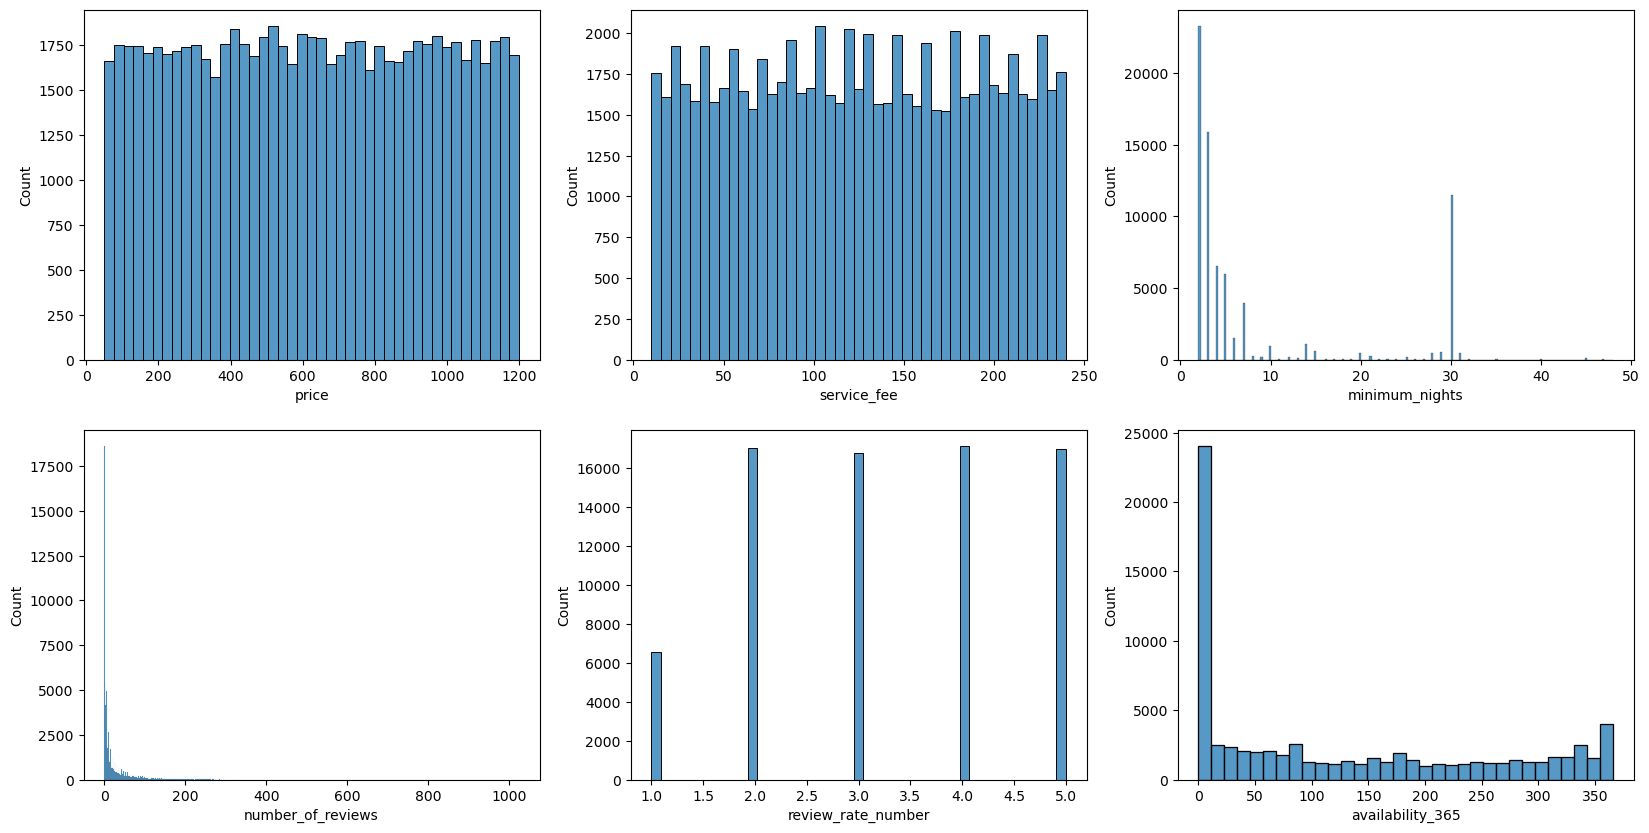

In [89]:
columns = ['price', 'service_fee', 'minimum_nights','number_of_reviews','review_rate_number', 'availability_365']
fig,ax = plt.subplots(2,3, figsize = (20,10))
ax = ax.flatten()
for i in range(len(columns)):
    sns.histplot(data_pd[columns[i]],ax = ax[i])

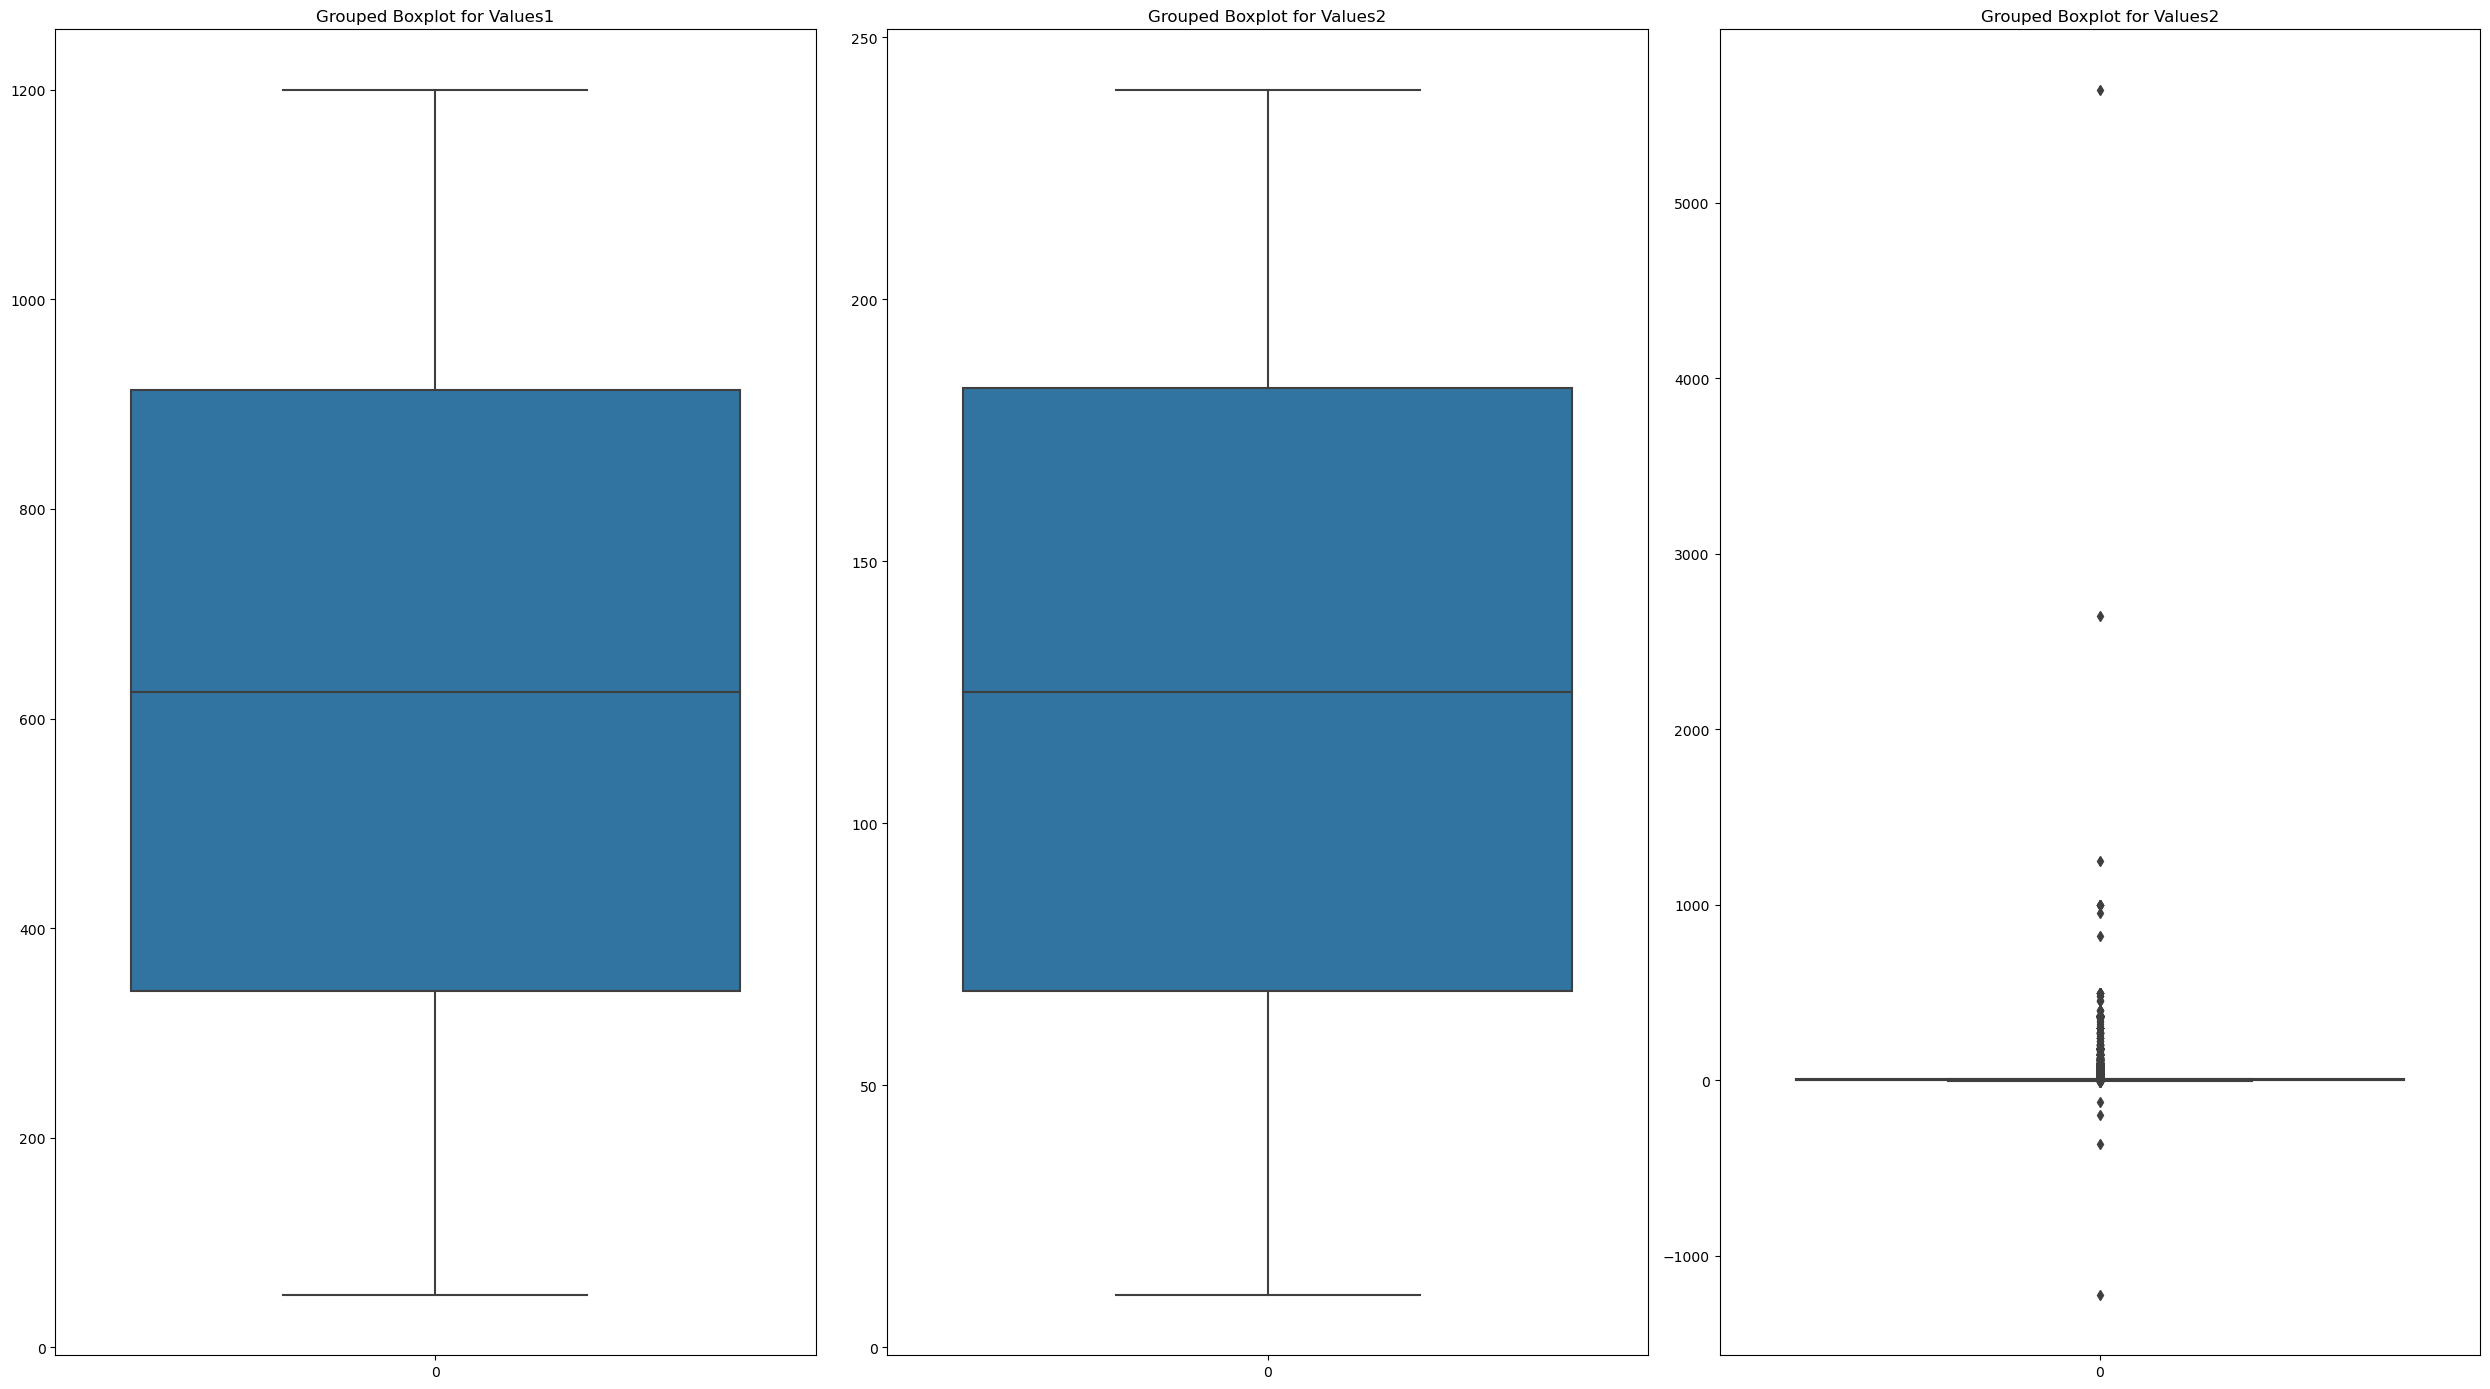

In [41]:

fig, axes = plt.subplots(1, 3, figsize=(25, 14))

sns.boxplot (data=data_pd.price, ax=axes[0])
axes[0].set_title('Grouped Boxplot for Values1')

sns.boxplot(data=data_pd.service_fee, ax=axes[1])
axes[1].set_title('Grouped Boxplot for Values2')

sns.boxplot(data=data_pd.minimum_nights, ax=axes[2])
axes[2].set_title('Grouped Boxplot for Values2')

plt.tight_layout()


plt.show()

In [42]:
data_pd['minimum_nights'] = np.where(data_pd['minimum_nights'] < 0, 0, data_pd['minimum_nights'])
data_pd['availability_365'] = np.where(data_pd['availability_365'] < 0, 0, data_pd['availability_365'])
data_pd['availability_365'] = np.where(data_pd['availability_365'] > 366, 0, data_pd['availability_365'])

In [43]:
data_pd.availability_365

0         286.0
1         228.0
2         352.0
3         322.0
4         289.0
          ...  
102594    227.0
102595      0.0
102596    342.0
102597      0.0
102598     69.0
Name: availability_365, Length: 100588, dtype: float64

<Axes: >

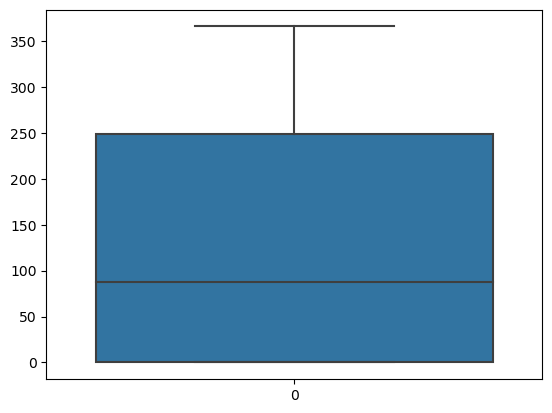

In [44]:
sns.boxplot(data=data_pd.availability_365)

In [45]:
lower_percentile = data_pd.minimum_nights.quantile(0.01)
upper_percentile = data_pd.minimum_nights.quantile(0.99)

data_pd = data_pd[(data_pd.minimum_nights > lower_percentile) & (data_pd.minimum_nights < upper_percentile)]

In [46]:
data_pd['days_booked'] = (365 - data_pd['availability_365'])

In [47]:
data_pd['revenue'] = data_pd['price'] * data_pd['days_booked']

In [48]:
data_pd.groupby(['construction_year','neighbourhood_group'],as_index=False)\
    .agg({'revenue':'sum'})\
    .sort_values(by=['construction_year','revenue'],ascending=[False,False])\
    .query("construction_year>2018")\
    .reset_index(drop=True)

construction_year neighbourhood_group      revenue
0                2022            Brooklyn  258538262.0
1                2022           Manhattan  236259838.0
2                2022              Queens   53886883.0
3                2022               Bronx   13343896.0
4                2022       Staten Island    2028045.0
5                2021           Manhattan  234978082.0
6                2021            Brooklyn  219855999.0
7                2021              Queens   68589227.0
8                2021               Bronx   10297648.0
9                2021       Staten Island    3701649.0
10               2020            Brooklyn  243673356.0
11               2020           Manhattan  232254443.0
12               2020              Queens   57888565.0
13               2020               Bronx   13701663.0
14               2020       Staten Island    4308654.0
15               2019            Brooklyn  263026484.0
16               2019           Manhattan  230712051.0
17               2019              Queens   55667646.0
18               2019               Bronx    6329519.0
19               2019       Staten Island    3187801.0

In [49]:
avg_revenue = data_pd.groupby(['neighbourhood_group'],as_index=False)\
    .agg({'revenue':'mean'})\
    .sort_values(by=['revenue'],ascending=[False])\
    .reset_index(drop=True)

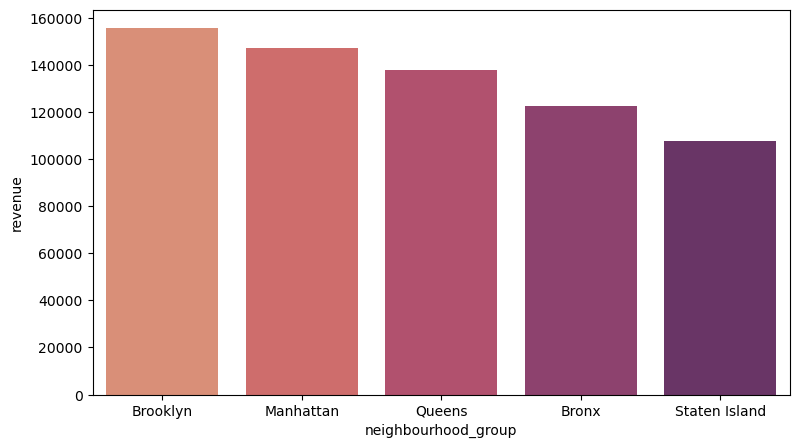

In [50]:
plt.figure(figsize=(9, 5))
ax = sns.barplot(x="neighbourhood_group", y="revenue", data=avg_revenue,palette = "flare")
plt.show() 

In [51]:
data_pd.groupby(['neighbourhood_group'],as_index=False)\
    .agg({'price':'mean'})\
    .sort_values(by=['price'],ascending=[False])\
    .reset_index(drop=True)

neighbourhood_group       price
0              Queens  630.621832
1               Bronx  630.130852
2       Staten Island  629.149123
3            Brooklyn  627.315149
4           Manhattan  622.086349

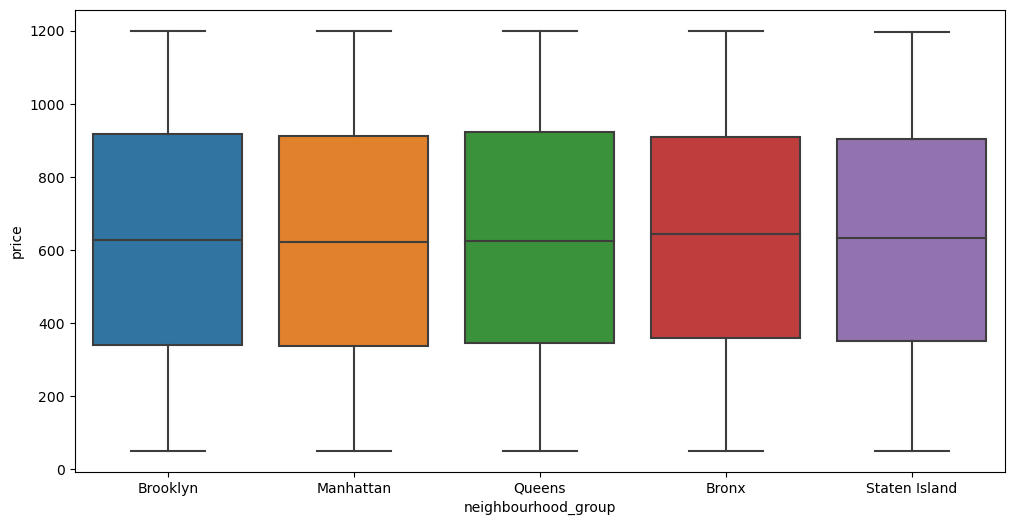

In [52]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="neighbourhood_group", y="price", data=data_pd)
plt.show()

In [53]:
data_pd.groupby(['neighbourhood_group'],as_index=False)\
    .agg({'review_rate_number':'mean'})\
    .sort_values(by=['review_rate_number'],ascending=[False])\
    .reset_index(drop=True)

neighbourhood_group  review_rate_number
0       Staten Island            3.387427
1              Queens            3.337354
2               Bronx            3.319797
3           Manhattan            3.281472
4            Brooklyn            3.259934

In [80]:
review_rate_number_5 = data_pd[['neighbourhood_group','review_rate_number']].loc[data_pd.review_rate_number==5]\
                                         .groupby(['neighbourhood_group'],as_index=False)\
                                         .agg({'review_rate_number':'count'})\
                                         .sort_values(by=['review_rate_number'],ascending=[False])\
                                         .reset_index(drop=True)

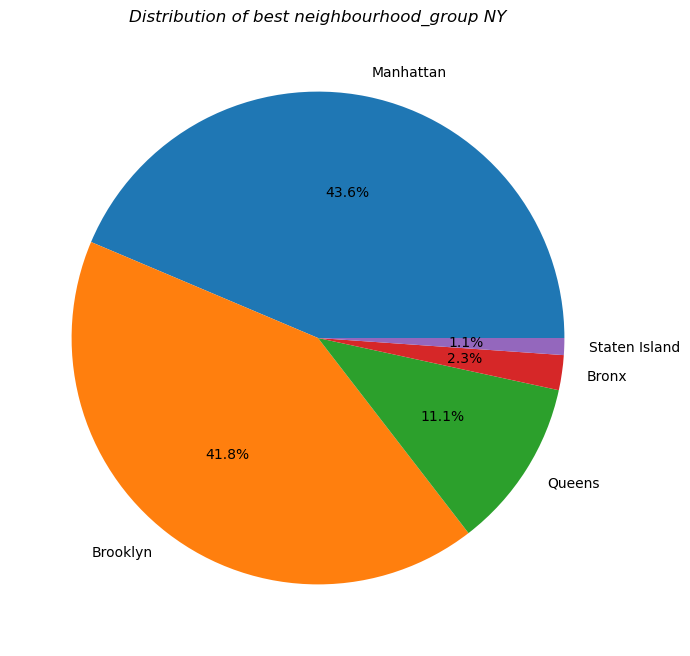

In [85]:
plt.figure(figsize=(12, 8))
category = review_rate_number_5["review_rate_number"]
plt.pie(
    x=category,
    labels=review_rate_number_5["neighbourhood_group"],
    autopct='%1.1f%%'
)
plt.title(label='Distribution of best neighbourhood_group NY',
          fontstyle='italic')
plt.show()


In [55]:
data_pd[['neighbourhood_group','review_rate_number']].loc[data_pd.review_rate_number==1]\
                                         .groupby(['neighbourhood_group'],as_index=False)\
                                         .agg({'review_rate_number':'count'})\
                                         .sort_values(by=['review_rate_number'],ascending=[False])\
                                         .reset_index(drop=True)

neighbourhood_group  review_rate_number
0            Brooklyn                3030
1           Manhattan                2846
2              Queens                 544
3               Bronx                 118
4       Staten Island                  39

In [56]:
neighbourhood_group_review= data_pd.groupby(['neighbourhood_group','review_rate_number'],as_index=False)\
                        .agg({'price':'count'})\
                        .sort_values(by=['review_rate_number'],ascending=[False])\
                        .reset_index(drop=True)

In [57]:
neighbourhood_group_review.rename(columns={'price':'count_of_hotels'},inplace=True)
neighbourhood_group_review.head(10)

neighbourhood_group  review_rate_number  count_of_hotels
0       Staten Island                 5.0              188
1               Bronx                 5.0              389
2              Queens                 5.0             1891
3            Brooklyn                 5.0             7099
4           Manhattan                 5.0             7405
5           Manhattan                 4.0             7298
6       Staten Island                 4.0              139
7               Bronx                 4.0              415
8              Queens                 4.0             1950
9            Brooklyn                 4.0             7334

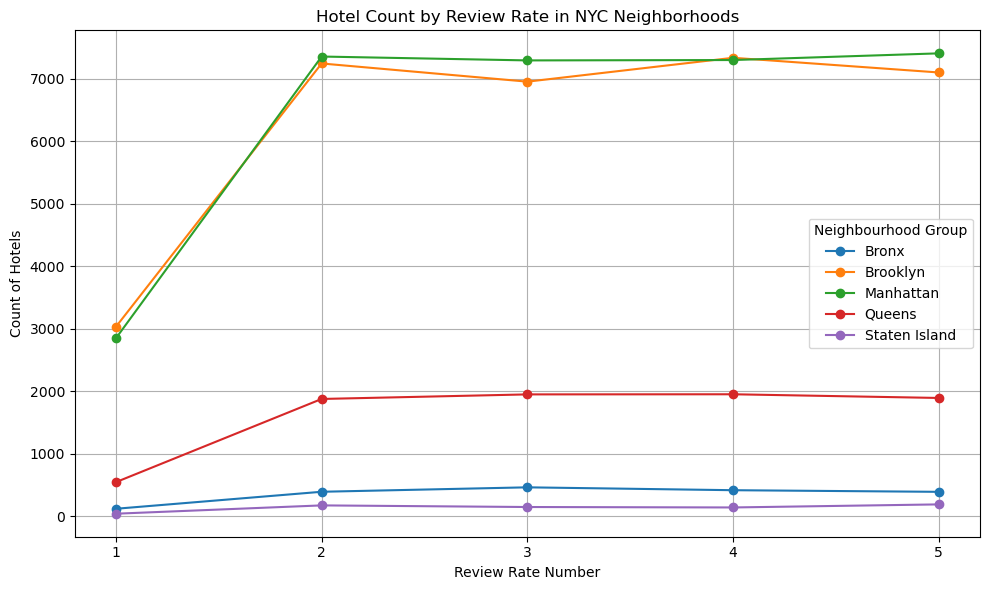

In [58]:
pivot_df = neighbourhood_group_review.pivot(index='review_rate_number', columns='neighbourhood_group')

plt.figure(figsize=(10, 6))

for col in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[col], marker='o', label=col[1])

plt.title('Hotel Count by Review Rate in NYC Neighborhoods')
plt.xlabel('Review Rate Number')
plt.ylabel('Count of Hotels')
plt.legend(title='Neighbourhood Group')
plt.xticks(pivot_df.index)
plt.grid(True)
plt.tight_layout()
plt.show()

In [78]:
fig = px.scatter_mapbox(
    data_pd, 
    lat= "lat",
    lon= "long",
    center={"lat": 40.7128, "lon": -74.0060},  
    width=800,
    height=800,  
    hover_data=["price"], 
) 

fig.update_layout(mapbox_style="open-street-map")

fig.show()

In [61]:
data_pd_h = data_pd.groupby(['neighbourhood_group'],as_index=False)\
    .agg({'revenue':'mean','service_fee':'mean'})\
    .sort_values(by=['revenue','service_fee'],ascending=[False,False])\
    .reset_index(drop=True)

In [62]:
data_pd_h

neighbourhood_group        revenue  service_fee
0            Brooklyn  155677.852202   125.464780
1           Manhattan  147217.380773   124.417487
2              Queens  137628.735136   126.128899
3               Bronx  122340.234631   126.028765
4       Staten Island  107489.950292   125.828947

In [63]:
data_pd[['revenue', 'service_fee']].describe()

revenue   service_fee
count   74518.000000  74518.000000
mean   148798.975268    125.102217
std    120483.561892     66.349197
min     -1178.000000     10.000000
25%     42558.750000     68.000000
50%    120979.500000    125.000000
75%    236155.000000    183.000000
max    438000.000000    240.000000

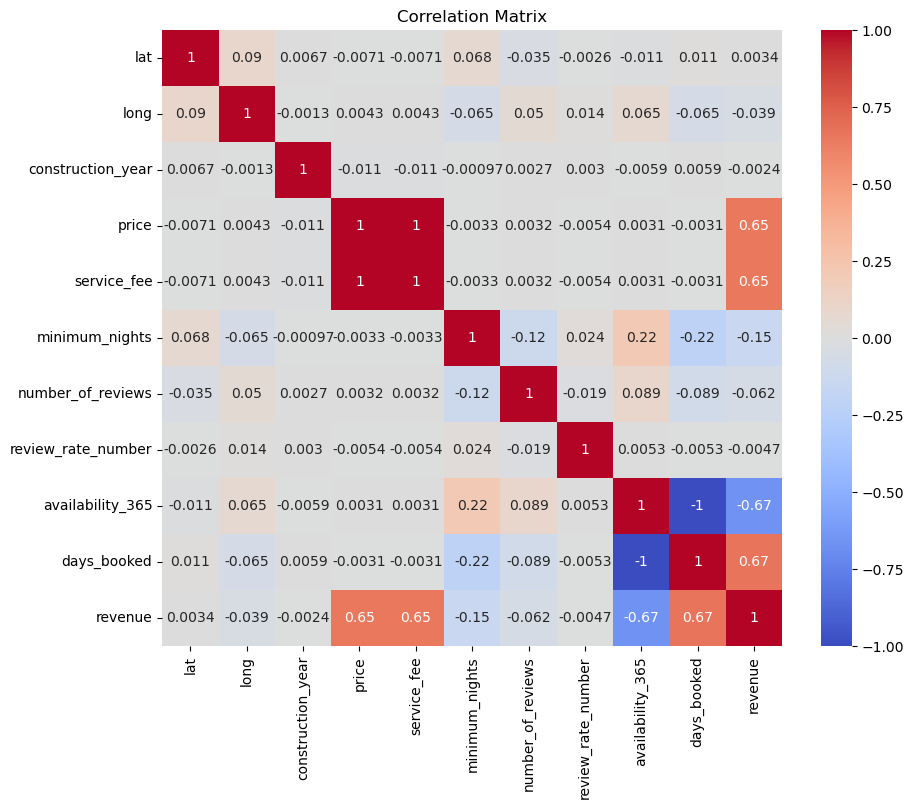

In [86]:
corr_matrix = data_pd.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

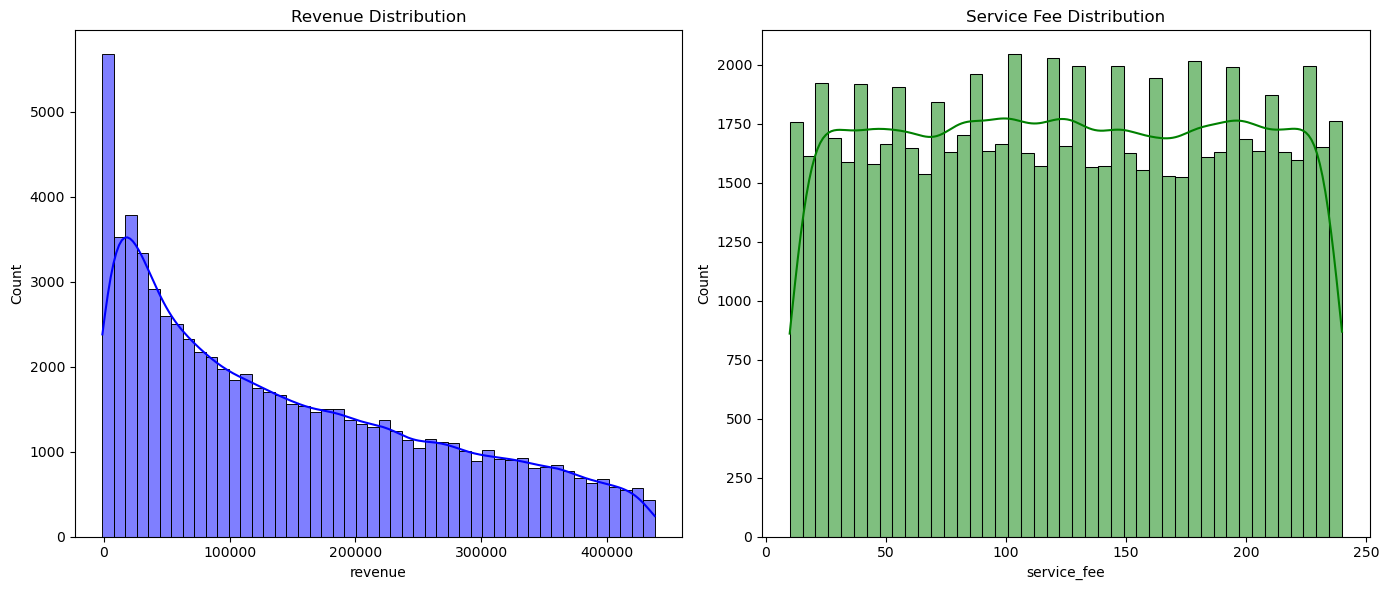

In [87]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data_pd['revenue'], kde=True, color='blue')
plt.title('Revenue Distribution')

plt.subplot(1, 2, 2)
sns.histplot(data_pd['service_fee'], kde=True, color='green')
plt.title('Service Fee Distribution')

plt.tight_layout()
plt.show()

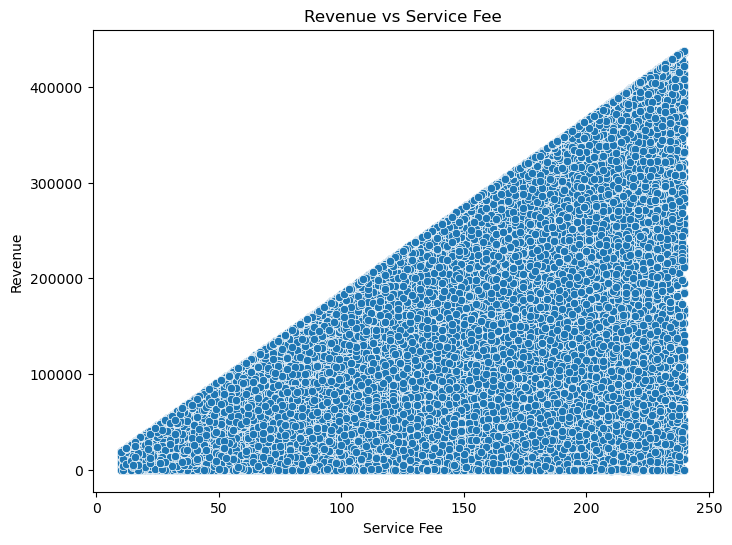

In [69]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='service_fee', y='revenue', data=data_pd)
plt.title('Revenue vs Service Fee')
plt.xlabel('Service Fee')
plt.ylabel('Revenue')
plt.show()

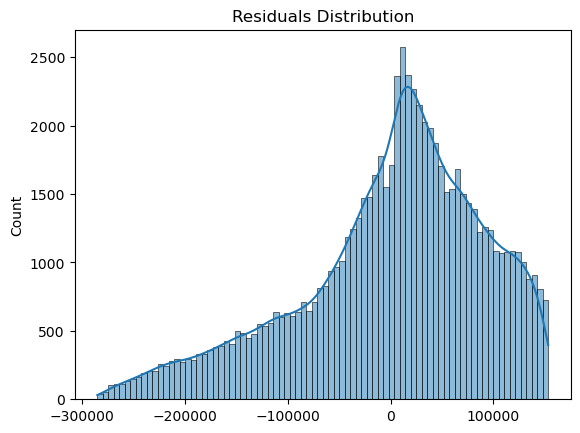

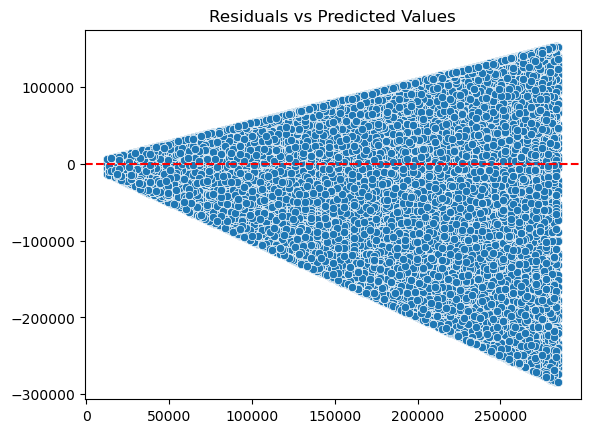

In [74]:
residuals = model.resid
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()

sns.scatterplot(x=predictions, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.show()

In [76]:
category_list = data_pd.groupby('room_type')['price'].apply(list)
Annova_result = f_oneway(*category_list)
print('P-value for Annova is : ',Annova_result[0])

P-value for Annova is :  4.049019917912301


In [77]:
cat_list = data_pd.groupby('cancellation_policy')['price'].apply(list)
Annova_result = f_oneway(*cat_list)
print('P-value for Annova is : ',Annova_result[0])

P-value for Annova is :  1.2003400851288077


P-value > 0,05, cancellation_policy и price не коррелируют 

In [ ]:
Выводы сделать 